## Zadanie 2

##### Rekurenycjne odwracanie macierzy

In [237]:
import numpy as np

In [249]:
from functools import reduce
def multi_dot(arrays): return reduce(np.dot, arrays)


def recursive_inversion(matrix):
    if matrix.shape[0] != matrix.shape[1]: raise Exception('Matrix is not a square')
    
    if matrix.shape == (1, 1):
        return np.array([[1/matrix[0, 0]]])
    
    if matrix.shape == (2, 2):
        det = matrix[0, 0]*matrix[1, 1] - matrix[0, 1]*matrix[1, 0]
        if det == 0: raise Exception('Matrix is invertible')
        return np.array([[matrix[1, 1]/det, -matrix[0, 1]/det], [-matrix[1, 0]/det, matrix[0, 0]/det]])
    
    else:
        n = matrix.shape[0]
        m = n//2
        A = matrix[:m, :m]
        B = matrix[:m, m:]
        C = matrix[m:, :m]
        D = matrix[m:, m:]
        
        A_inv = recursive_inversion(A)
        Common = recursive_inversion(D - multi_dot([C, A_inv, B]))
        
        P = A_inv+multi_dot([A_inv, B, Common, C, A_inv])
        Q = -multi_dot([A_inv, B, Common])
        R = -multi_dot([Common, C, A_inv])
        S = Common  

        Top = np.row_stack([P, R])
        Bottom = np.row_stack([Q,S])

        return np.column_stack([Top, Bottom])
    
def assert_same(A, B, sigma = 1e-7):
    for i,row in enumerate(A):
        for j, el in enumerate(row):
            assert abs(el-B[i][j]) < sigma


In [258]:
import time
from matplotlib import pyplot as plt

x = []
y_t = []
# y_op = []
for k in range(2,13):
    n = 2**k
    A = np.random.rand(n,n)
    start = time.time()
    _ = recursive_inversion(A)
    end = time.time()
    x.append(k)
    y_t.append(end-start)


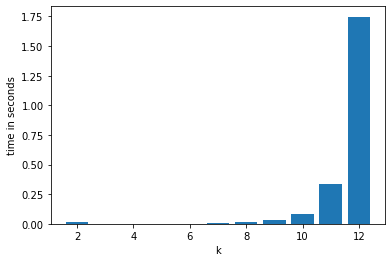

In [261]:
plt.bar(x, y_t)
plt.xlabel('k')
plt.ylabel('time in seconds');